# Life Expectancy Prediction

In [359]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import tree
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score

In [270]:
# Load the dataset
df=pd.read_csv("Life Expectancy Data.csv")

In [271]:
# EDA (Head)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Conclusion=The data has been loaded properly and the column name are inline with the rows.

In [272]:
# EDA (Shape and Size)
print(df.shape)
print(df.size)

(2938, 22)
64636


In [273]:
# EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Conclusion=There are missing values in the dataset and the column datatype matches with the data so there is no need of change of any dtype.

In [274]:
# Let us separate the numeric cols and categorical cols for better understanding of data
df_numeric=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)

In [275]:
# Numeric Data 
df_numeric.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [276]:
# Categorical data 
df_cat.head()

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing


<Axes: xlabel='Status', ylabel='Count'>

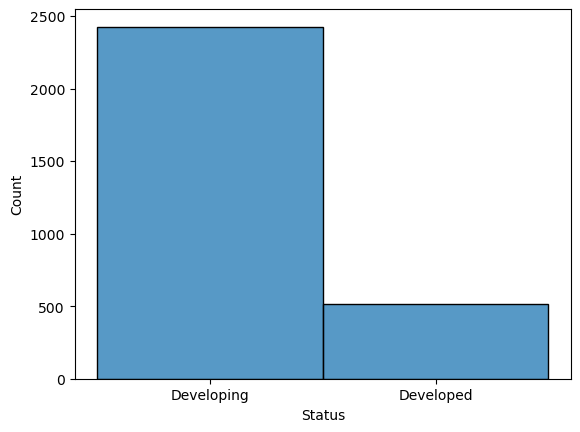

In [277]:
# Data visulization of categorical data
sns.histplot(df["Status"])

Conclusion=In our dataset there is more data of developing countries than developed countries.

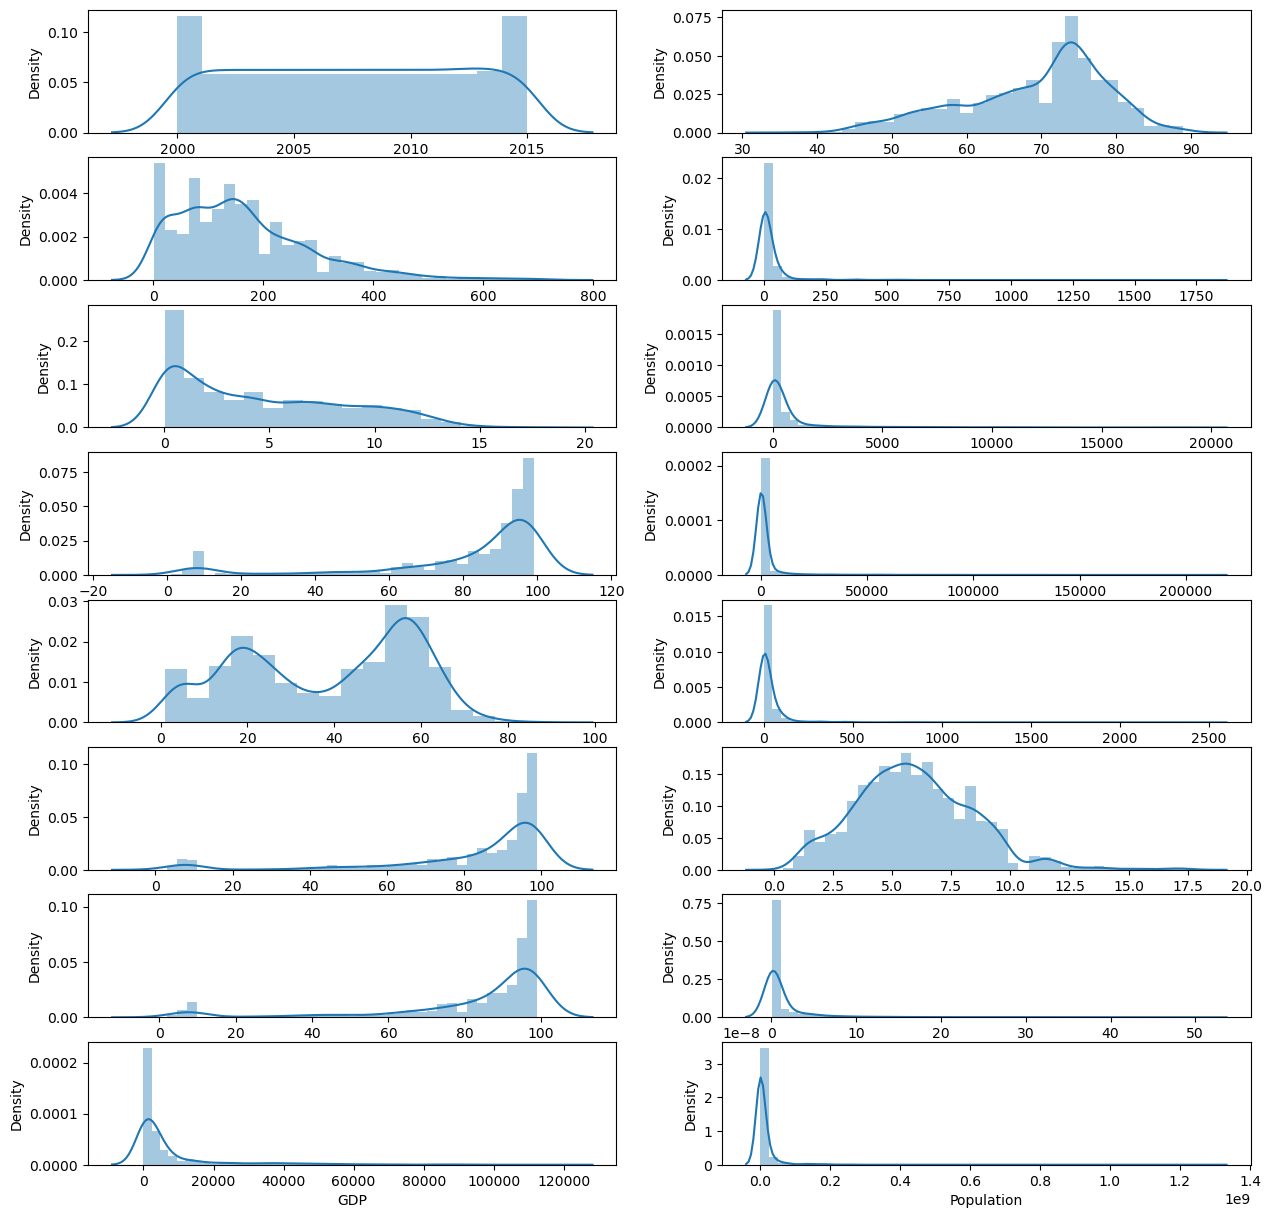

In [278]:
# Data visulization of numeric data
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=[15,15])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.distplot(df[col],ax=sub)

Conclusion=There is skewness in numeric columns.

In [279]:
# We are doing regression so let us check the collinerity
df_numeric.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


Conclusion=The taget column has highest correlation with schooling and income composition.

In [280]:
# EDA (Counrty with highest life expectnacy)
sorted(df[df["Life expectancy "]==df["Life expectancy "].max()]["Country"],reverse=True)

['Sweden',
 'Spain',
 'Portugal',
 'Norway',
 'New Zealand',
 'Italy',
 'Germany',
 'France',
 'France',
 'Finland',
 'Belgium']

Conclusion=countries like swedan,spain, portugal etc have the highest life expectancy.

In [281]:
# EDA (Counrty with lowest life expectnacy)
df[df["Life expectancy "]==df["Life expectancy "].min()]["Country"]

1127    Haiti
Name: Country, dtype: object

Conclusion=Haiti has the lowest life expectnacy.

In [282]:
# EDA (Counrty which have life expectnacy more than average)
df[df["Life expectancy "]>df["Life expectancy "].mean()]["Country"]

16       Albania
17       Albania
18       Albania
19       Albania
20       Albania
          ...   
2885    Viet Nam
2886    Viet Nam
2887    Viet Nam
2888    Viet Nam
2889    Viet Nam
Name: Country, Length: 1696, dtype: object

In [283]:
# EDA (Counrty which have life expectnacy less than average)
df[df["Life expectancy "]<df["Life expectancy "].mean()]["Country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: Country, Length: 1232, dtype: object

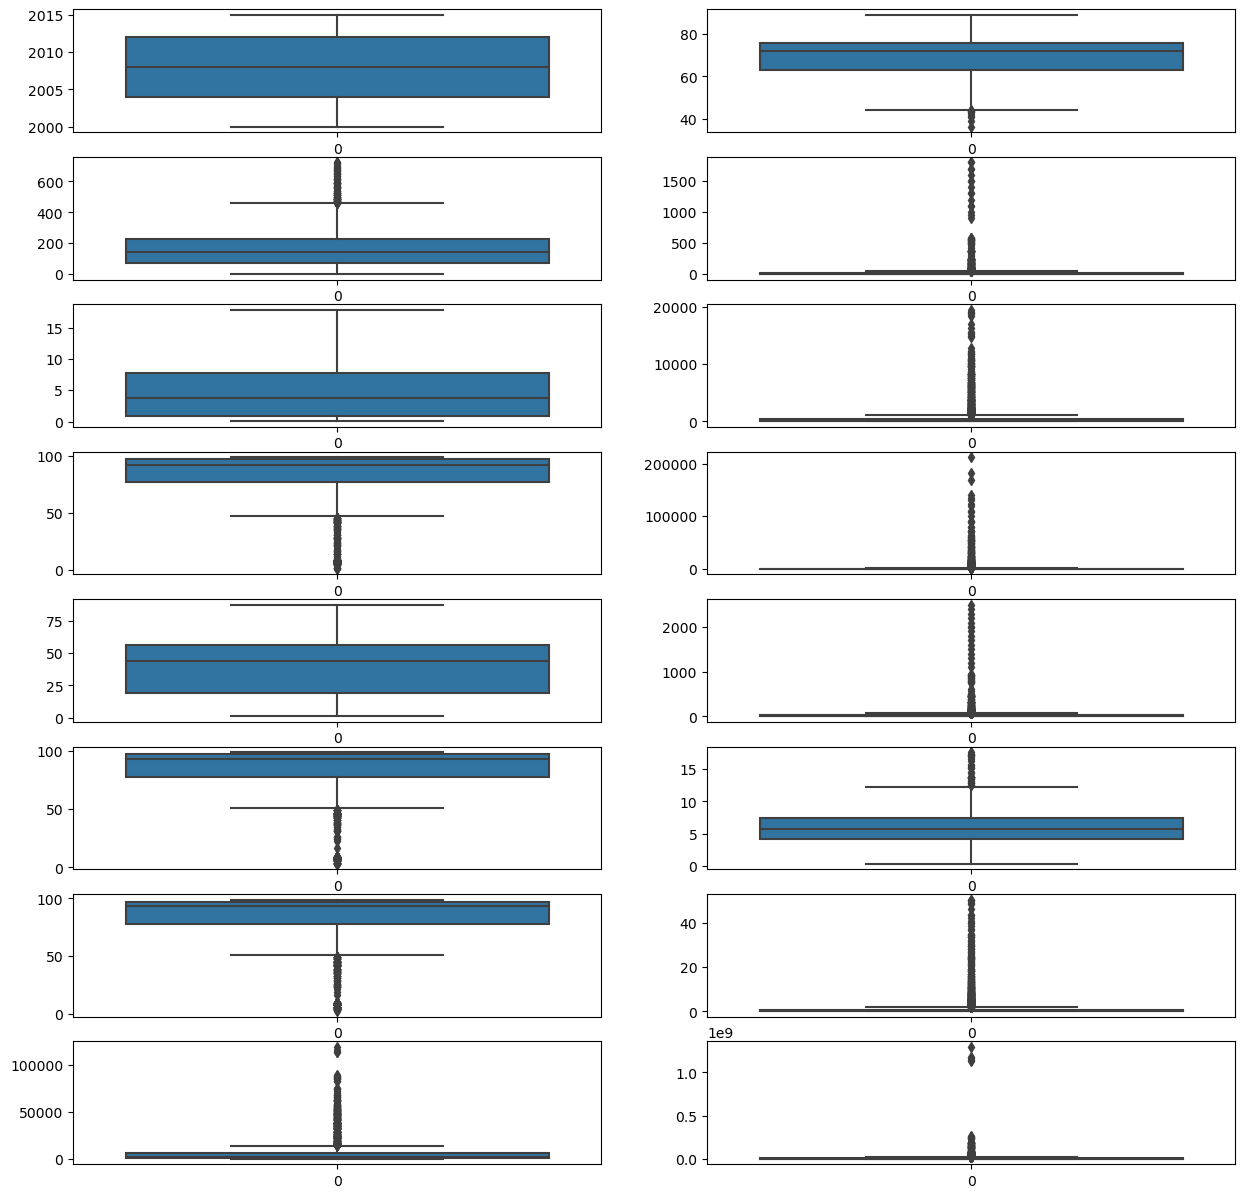

In [284]:
# Check of outliers 
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=[15,15])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

Conclusion=Many outliers.

# Probleam with the dataset
1) Feature selection 

2) Missing values

3) Outliers

4) Skewness

5) Muticolliearity 

6) Categorical data

7) Disimilar units

# Feature selection (Primary)

In [285]:
df=df.drop(["Country","Year"],axis=1)
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Conclusion=Countrties and year column were dopped because country has lot of unique featues and Year because we are doing prediction and not forecasting.

# Missing values

In [286]:
#Check of missing vales
df.isnull().sum()

Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [287]:
# Droppin the rows of target col which have missing vales 
df=df.dropna(subset="Life expectancy ",axis=0)

In [288]:
#Check of missing vales again
df.isnull().sum()

Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [289]:
# Treatment of missing values 
df_numeric=df.select_dtypes(include=np.number)
for col in df_numeric:
    df[col]=df[col].fillna(df[col].mean())

In [290]:
#Check of missing vales again
df.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Treatment of outliers

In [291]:
# Outliers treatment
df_numeric=df.select_dtypes(include=np.number)
for col in df_numeric:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    MX=Q3+(1.5*(IQR))
    MN=Q1-(1.5*(IQR))
    df[col]=np.where(df[col]>MX,MX,df[col])
    df[col]=np.where(df[col]<MN,MN,df[col])

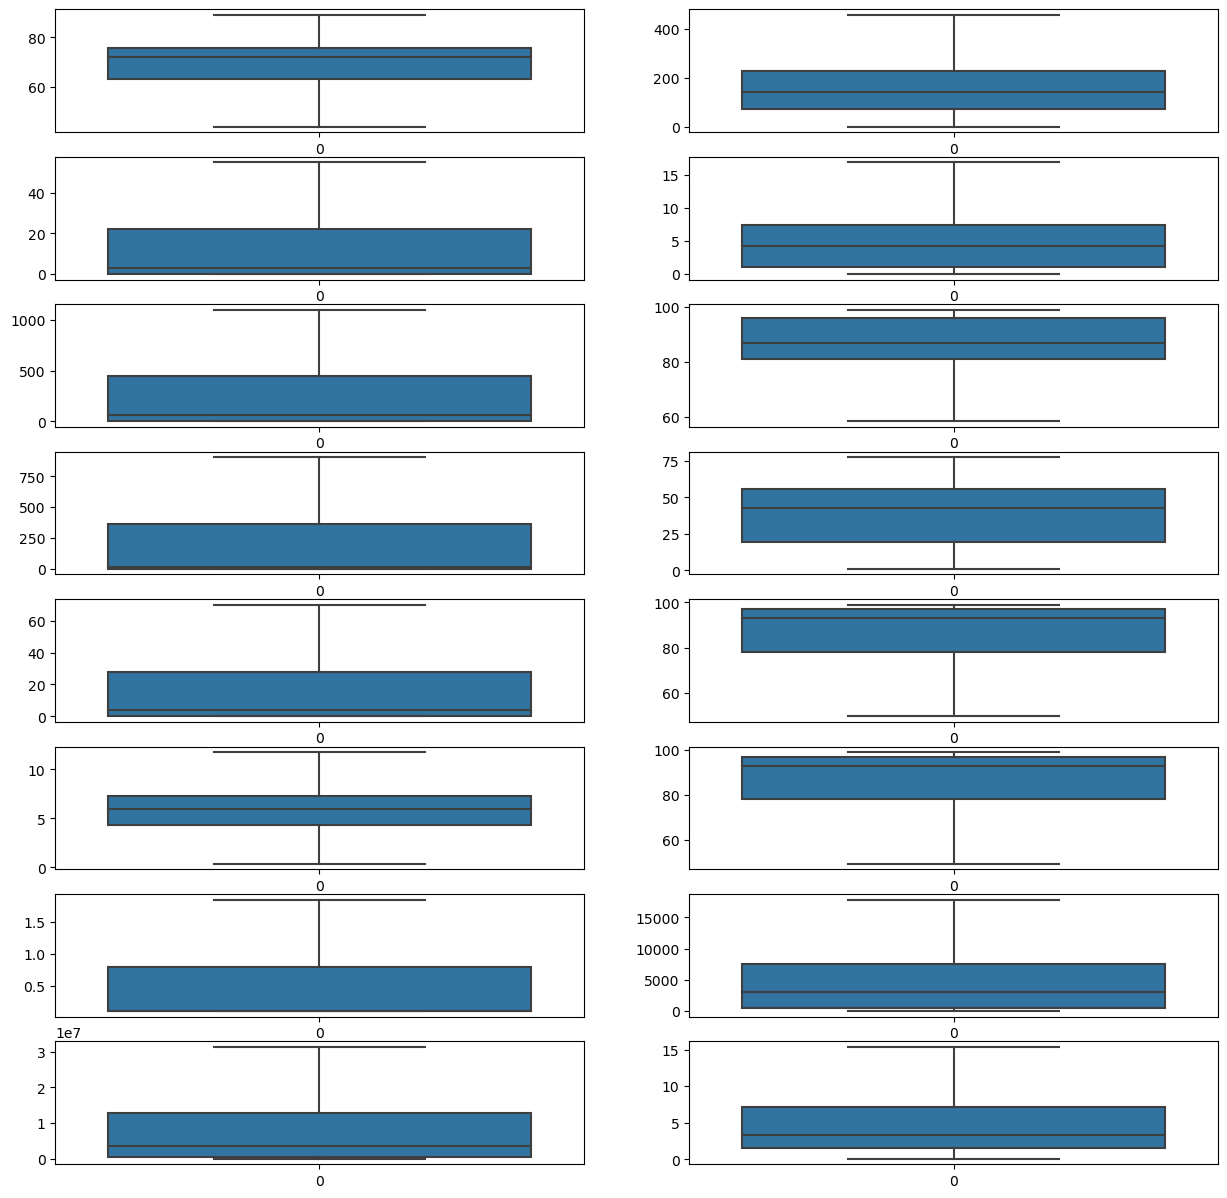

In [292]:
# Check of outliers 
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=[15,15])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

# Treatment of categorical data

In [293]:
# Treatment of categorical data
LB=LabelBinarizer()
df_cat=df.select_dtypes(exclude=np.number)
for col in df_cat:
    df[col]=LB.fit_transform(df[col])

# Treatment of Skewness and Unitless

In [294]:
# Standaidization
SS=StandardScaler()
Scaled_df=SS.fit_transform(df)
df_ss=pd.DataFrame(data=Scaled_df,columns=df.columns)
df_ss

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.460348,-0.445672,0.871086,2.160816,-1.176836,-0.547270,-1.537612,1.884396,-0.964155,2.061485,-2.265302,0.988621,-1.282015,-0.630709,-0.813774,2.649184,2.705541,2.734294,-0.795935,-0.628647
1,0.460348,-0.982602,0.940142,2.160816,-1.176836,-0.541521,-1.772450,0.721332,-0.989348,2.061485,-1.727189,0.997369,-1.472166,-0.630709,-0.808705,-0.824808,2.705541,2.734294,-0.811554,-0.660924
2,0.460348,-0.982602,0.914246,2.160816,-1.176836,-0.542301,-1.615891,0.546996,-1.014541,2.061485,-1.473960,0.975498,-1.345399,-0.630709,-0.805310,2.649184,2.705541,2.734294,-0.842792,-0.693201
3,0.460348,-1.024714,0.948774,2.160816,-1.176836,-0.529581,-1.381053,1.884396,-1.039734,2.061485,-1.157423,1.146095,-1.155248,-0.630709,-0.798499,-0.446692,2.705541,2.734294,-0.879235,-0.725478
4,0.460348,-1.056298,0.974671,2.160816,-1.176836,-0.711706,-1.302774,1.884396,-1.059889,2.061485,-1.094115,0.861767,-1.091864,-0.630709,-0.906585,-0.527307,2.705541,2.734294,-0.926092,-0.822309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0.460348,-2.624974,2.562974,0.696505,-0.064996,-0.729889,-1.302774,-0.574943,-0.561068,0.950871,-1.157423,0.538069,-1.282015,1.890947,-0.836925,0.572341,1.191756,1.174035,-1.170785,-0.919141
2924,0.460348,-2.603918,2.562974,0.644208,-0.141674,-0.729889,-2.054090,1.884396,-0.581222,0.911206,-2.265302,0.271238,-1.091864,1.890947,-0.837106,0.556224,1.293523,1.299862,-1.113517,-0.822309
2925,0.460348,-2.572334,-0.769010,0.591911,-0.047104,-0.729889,-0.911377,0.192699,-0.601376,0.871542,-0.777578,0.275612,-0.901714,1.890947,-0.907688,-0.847483,-0.894469,-0.864367,-1.066660,-0.660924
2926,0.460348,-2.519694,2.562974,0.591911,-0.739767,-0.729889,-0.676539,0.825372,-0.621531,0.831877,-0.587656,0.113763,-0.648179,1.890947,-0.820132,0.526179,-0.792702,-0.763705,-1.066660,-0.725478


# Treatment of Muticollinarity (Without loss of information)

In [300]:
# PCA
df_numeric=df_ss.drop(["Status","Life expectancy "],axis=1)
pca=PCA(n_components=5)
pca.fit(df_numeric)

PCA(n_components=5)

In [301]:
#Explained Vriance
list(np.round(pca.explained_variance_,2))

[7.17, 1.81, 1.72, 1.19, 1.11]

Conclusion=There are 5 PC enough.

In [323]:
#Data of PCA
pca_result=pca.fit_transform(df_numeric)
pca_result

array([[ 5.37160959,  0.74382992,  2.99893347,  0.23773567, -0.51059172],
       [ 4.96597905,  0.42178826,  0.79043941,  1.16051442,  0.04491306],
       [ 4.99313631,  0.3106078 ,  2.57655673,  0.23362599, -0.34605338],
       ...,
       [ 1.82856352,  1.40265669, -1.47103856, -1.14623178,  0.14794537],
       [ 2.82768233,  1.08700239, -0.84475445, -1.43852186,  1.16554017],
       [ 4.09364428, -0.33434902,  0.32664867,  0.19767287,  1.69900604]])

In [324]:
#Creating a dataframe of the same 
pca_df=pd.DataFrame(data=pca_result,columns=["PC1","PC2","PC3","PC4","PC5"])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,5.371610,0.743830,2.998933,0.237736,-0.510592
1,4.965979,0.421788,0.790439,1.160514,0.044913
2,4.993136,0.310608,2.576557,0.233626,-0.346053
3,4.960211,0.056763,1.563015,0.814371,0.325232
4,5.065702,-0.162622,1.483289,0.755834,0.209044
...,...,...,...,...,...
2923,3.923369,0.813592,-0.975155,0.142505,1.476278
2924,4.799623,1.716045,-0.206307,0.421613,0.940851
2925,1.828564,1.402657,-1.471039,-1.146232,0.147945
2926,2.827682,1.087002,-0.844754,-1.438522,1.165540


In [325]:
#Creating final df
X=df_ss[["Status","Life expectancy "]]
X

,Status,Life expectancy
0,0.460348,-0.445672
1,0.460348,-0.982602
2,0.460348,-0.982602
3,0.460348,-1.024714
4,0.460348,-1.056298
...,...,...
2923,0.460348,-2.624974
2924,0.460348,-2.603918
2925,0.460348,-2.572334
2926,0.460348,-2.519694


In [328]:
#Final df
df_final=pd.concat([pca_df,X],axis=1)
df_final

,PC1,PC2,PC3,PC4,PC5,Status,Life expectancy
0,5.371610,0.743830,2.998933,0.237736,-0.510592,0.460348,-0.445672
1,4.965979,0.421788,0.790439,1.160514,0.044913,0.460348,-0.982602
2,4.993136,0.310608,2.576557,0.233626,-0.346053,0.460348,-0.982602
3,4.960211,0.056763,1.563015,0.814371,0.325232,0.460348,-1.024714
4,5.065702,-0.162622,1.483289,0.755834,0.209044,0.460348,-1.056298
...,...,...,...,...,...,...,...
2923,3.923369,0.813592,-0.975155,0.142505,1.476278,0.460348,-2.624974
2924,4.799623,1.716045,-0.206307,0.421613,0.940851,0.460348,-2.603918
2925,1.828564,1.402657,-1.471039,-1.146232,0.147945,0.460348,-2.572334
2926,2.827682,1.087002,-0.844754,-1.438522,1.165540,0.460348,-2.519694


# Model Building

In [330]:
# Tranin test Split
X=df_final.drop("Life expectancy ",axis=1)
y=df_final["Life expectancy "]
X_train,X_test,y_train,y_test=train_test_split(X,y)

# 1) Multiple Regression

In [331]:
# Multiple Regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [332]:
# Traning and test score
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8107592232759087
0.8071073501366568


In [333]:
#r2 value
prediction_lr=lr.predict(X_test)
print("r2 score is",r2_score(y_test,prediction_lr))

r2 score is 0.8071073501366568


# 2) SVM

In [334]:
# SVM
SVM=SVR()
SVM.fit(X_train,y_train)

SVR()

In [335]:
#Traning and testing score
print(SVM.score(X_train,y_train))
print(SVM.score(X_test,y_test))

0.8665221751297576
0.8487549521526242


In [336]:
#r2 value
prediction_svm=SVM.predict(X_test)
print("r2 score is",r2_score(y_test,prediction_svm))

r2 score is 0.8487549521526242


# 3) KNN

In [341]:
# KNN 
KNN=KNeighborsRegressor(n_neighbors=11)
KNN.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [342]:
#Traning and testing score
print(KNN.score(X_train,y_train))
print(KNN.score(X_test,y_test))

0.8830238104215156
0.8467086568873692


In [343]:
#r2 value
prediction_knn=KNN.predict(X_test)
print("r2 score is",r2_score(y_test,prediction_knn))

r2 score is 0.8467086568873692


# 4) Decsion Tree  

In [347]:
# Decison Tree
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [348]:
# Traning and testing score
print(DT.score(X_train,y_train))
print(DT.score(X_test,y_test))

1.0
0.7389255687571115


[Text(0.5270831334418595, 0.9821428571428571, 'PC1 <= 1.114\nsquared_error = 0.984\nsamples = 2196\nvalue = -0.019'),
 Text(0.27322703759595807, 0.9464285714285714, 'PC1 <= -2.125\nsquared_error = 0.326\nsamples = 1441\nvalue = 0.534'),
 Text(0.10623170786198885, 0.9107142857142857, 'PC2 <= 1.249\nsquared_error = 0.173\nsamples = 493\nvalue = 0.988'),
 Text(0.03183204372984607, 0.875, 'PC1 <= -3.945\nsquared_error = 0.169\nsamples = 348\nvalue = 0.884'),
 Text(0.004036372031367526, 0.8392857142857143, 'PC4 <= 1.732\nsquared_error = 0.085\nsamples = 25\nvalue = 1.324'),
 Text(0.003559752455707892, 0.8035714285714286, 'PC1 <= -4.451\nsquared_error = 0.064\nsamples = 24\nvalue = 1.292'),
 Text(0.0009532391513192681, 0.7678571428571429, 'PC3 <= 0.478\nsquared_error = 0.007\nsamples = 3\nvalue = 1.66'),
 Text(0.00047661957565963407, 0.7321428571428571, 'squared_error = 0.0\nsamples = 1\nvalue = 1.555'),
 Text(0.0014298587269789022, 0.7321428571428571, 'PC5 <= 1.265\nsquared_error = 0.003\ns

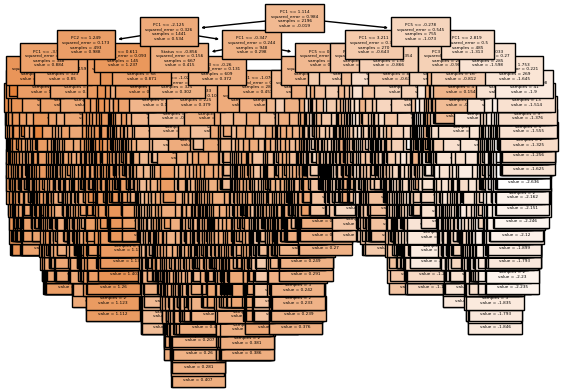

In [355]:
# Plot of tree
tree.plot_tree(decision_tree=DT,feature_names=X_train.columns,filled=True,fontsize=3)

Conclusio=The model is overfitting hence prunning needs to be done.

In [362]:
# Hyperparameter Tunning
Grid={"max_depth":[2,3,4,5,6],"min_samples_split":list(range(0,200)),"min_samples_leaf":list(range(0,200))}
Search=RandomizedSearchCV(estimator=DT,param_distributions=Grid,cv=10)
Search.fit(X_train,y_train)
Search.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=71, min_samples_split=137)

In [363]:
# DT with Prunning
DT_P=DecisionTreeRegressor(max_depth=6, min_samples_leaf=71, min_samples_split=137)
DT_P.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=71, min_samples_split=137)

In [365]:
# Trnaing and testing score
print(DT_P.score(X_train,y_train))
print(DT_P.score(X_test,y_test))

0.7940827536136656
0.7778028269667455


[Text(0.5282258064516129, 0.9285714285714286, 'PC1 <= 1.114\nsquared_error = 0.984\nsamples = 2196\nvalue = -0.019'),
 Text(0.29838709677419356, 0.7857142857142857, 'PC1 <= -2.125\nsquared_error = 0.326\nsamples = 1441\nvalue = 0.534'),
 Text(0.12903225806451613, 0.6428571428571429, 'PC2 <= 1.249\nsquared_error = 0.173\nsamples = 493\nvalue = 0.988'),
 Text(0.06451612903225806, 0.5, 'PC1 <= -2.995\nsquared_error = 0.169\nsamples = 348\nvalue = 0.884'),
 Text(0.03225806451612903, 0.35714285714285715, 'squared_error = 0.159\nsamples = 139\nvalue = 1.032'),
 Text(0.0967741935483871, 0.35714285714285715, 'PC5 <= -0.229\nsquared_error = 0.151\nsamples = 209\nvalue = 0.785'),
 Text(0.06451612903225806, 0.21428571428571427, 'squared_error = 0.134\nsamples = 83\nvalue = 0.974'),
 Text(0.12903225806451613, 0.21428571428571427, 'squared_error = 0.124\nsamples = 126\nvalue = 0.661'),
 Text(0.1935483870967742, 0.5, 'PC3 <= 0.659\nsquared_error = 0.093\nsamples = 145\nvalue = 1.237'),
 Text(0.16129

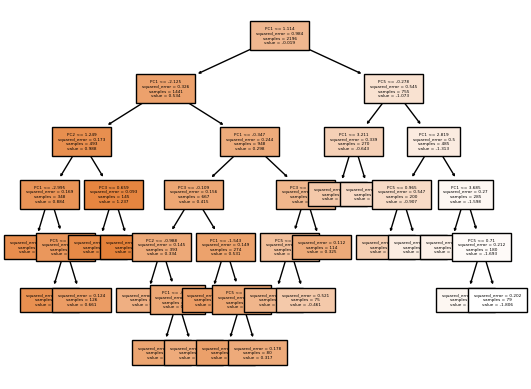

In [367]:
# Tree
tree.plot_tree(decision_tree=DT_P,feature_names=X_train.columns,filled=True,fontsize=3)

In [369]:
# r2score
preidction_dt=DT_P.predict(X_test)
print(r2_score(y_test,preidction_dt))

0.7778028269667455


# 5) Random Forest

In [371]:
# Random Forest
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [372]:
# Traning and testing score
RF.score(X_train,y_train)
RF.score(X_test,y_test)

0.8615562328447457

In [373]:
# r2score
preidction_rf=RF.predict(X_test)
print(r2_score(y_test,preidction_rf))

0.8615562328447457


# 6) Adaboost

In [375]:
# Adaboost
ad=AdaBoostRegressor()
ad.fit(X_train,y_train)

AdaBoostRegressor()

In [376]:
# Traning and testing score 
print(ad.score(X_train,y_train))
print(ad.score(X_test,y_test))

0.8163458394089127
0.8091480444539481


In [377]:
# r2 score
preidction_ad=ad.predict(X_test)
print(r2_score(y_test,preidction_ad))

0.8091480444539481


# 7) Gradient Boost 

In [378]:
# Gradient Boost
GB=GradientBoostingRegressor()
GB.fit(X_train,y_train)

GradientBoostingRegressor()

In [379]:
# Traning and testing score
print(GB.score(X_train,y_train))
print(GB.score(X_test,y_test))

0.8820850519725886
0.8401176164280829


In [381]:
# r2 score
preidction_gb=GB.predict(X_test)
print(r2_score(y_test,preidction_gb))

0.8401176164280829
